*Author: C Mitchell*

This notebook calculates the mean, max, min and st dev spectra for all the Asco, Fucus and Chondrus lab data (as requested from Stefan).

# Initialization

Importing the libraries

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import warnings

%matplotlib inline

Importing data

In [2]:
sldf = pd.read_csv('../data/spectral_library.csv')

Extracting only the data with a wavelength of less than 1800 nm

In [3]:
sldf = sldf.loc[sldf.Wvl <= 1800]

Taking only the mean columns and removing `_mean` from all the column names (so we can merge with the sample info)

In [4]:
meandf = sldf.filter(regex = '_mean')
meandf = meandf.rename(columns=lambda x: re.sub('_mean','',x))

In [5]:
meandf

,Basin_Asco1,Basin_Asco1b,Basin_Asco1c,Basin_Asco2,Basin_Asco2b,Basin_Asco2c,Basin_Asco3,Basin_Asco3b,Basin_Asco3c,Basin_Asco4,...,Bigelow_asco_salad,Bigelow_fucus1,Bigelow_fucus2,Bigelow_fucus3,Bigelow_fucus4,Bigelow_fucus5,Bigelow_fucus6,Bigelow_fucus7,Bigelow_fucus8,Bigelow_fucus_salad
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.550833,3.472927,3.725000,3.995610,3.888537,3.507561,3.666458,5.701364,4.692683,3.728333
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.209167,3.301951,3.543333,3.609756,3.792683,3.170732,3.502708,5.213864,4.450488,3.293333
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,4.173333,3.119512,3.269762,3.330000,3.537073,3.079512,3.302083,4.773182,4.311220,3.222500
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.677500,2.841463,3.117857,3.086098,3.134634,2.903171,3.018125,4.620909,3.854634,2.963333
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,3.375000,2.673659,2.923810,2.949024,2.976098,2.699512,2.793750,4.345000,3.515366,2.715833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1453,5.322240,6.238335,5.420100,4.215593,5.009593,5.055370,4.491230,5.001062,5.359172,4.041010,...,5.906667,7.385122,7.043810,7.292195,7.466098,6.686585,7.607292,10.561591,8.026341,6.766667
1454,5.305245,6.223660,5.393200,4.212805,4.993430,5.038897,4.460898,4.976633,5.338345,4.028103,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1455,5.286290,6.202393,5.363247,4.207648,4.971980,5.015695,4.426865,4.950648,5.313012,4.013327,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1456,5.272860,6.179212,5.337052,4.199965,4.950562,4.988443,4.398055,4.929553,5.285665,4.000123,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Summarizing the mean reflectance data into overall stats for a given species

Note, I need to bin the wavelengths into 5 nm bins to do the summary stats because each of the different sensors had different wavelength intervals, and so we need to merge the results from each of the different sensor types before taking the means.

In [6]:
wvlbins = np.arange(340,1805,5)
wvlcut = pd.cut(sldf.Wvl,wvlbins)

In [7]:
resultdict = lambda df : {'mean' : df.mean(axis=1),
             'max' : df.max(axis=1),
             'min' : df.min(axis=1),
             'stdev' : df.std(axis=1)}

In [8]:
dfkeys = ['asco', 'fucus','chondrus']
dfsummary = {}
for dfk in dfkeys:
    df = meandf.filter(regex = re.compile(dfk, re.IGNORECASE))
    df['Wvl'] = sldf.Wvl
    grouped = df.groupby(wvlcut).mean()
    
    dfs = pd.DataFrame(resultdict(grouped.drop('Wvl',axis=1)))
    dfs['Wvl'] = grouped['Wvl']
    dfsummary[dfk] = dfs

C:\Users\cmitchell\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


# Visualizing the results

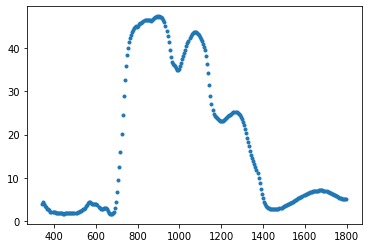

In [9]:
plt.figure()
plt.plot(dfsummary['asco'].Wvl, dfsummary['asco']['mean'],'.')

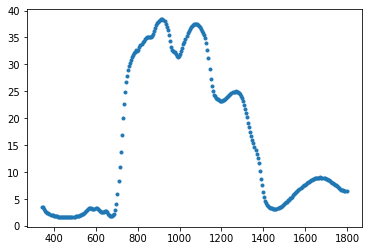

In [10]:
plt.figure()
plt.plot(dfsummary['fucus'].Wvl, dfsummary['fucus']['mean'],'.')

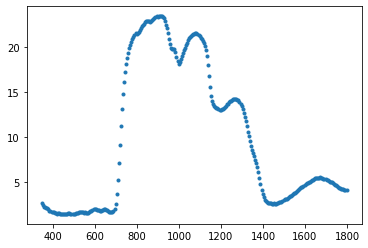

In [11]:
plt.figure()
plt.plot(dfsummary['chondrus'].Wvl, dfsummary['chondrus']['mean'],'.')

# Saving data

In [13]:
dfsummary['asco'].to_csv('../data/asco_summary.csv',index=False)
dfsummary['fucus'].to_csv('../data/fucus_summary.csv',index=False)
dfsummary['chondrus'].to_csv('../data/chondrus_summary.csv',index=False)